# GRIP- Data Science and Business Analytics - Feb"2022

**Task 1- Prediction using supervised ML**

Aurthor: **Sania Agarwal**

We will be working on [Student score dataset](http://bit.ly/w-data) .

**Problem Statement(s):**
1. Create a model to predict the scores of students based on the number of study hours.
2. What will be pridicted score if student studied for 9.25 hr/day?


# Reading dataset

In [48]:
#Importing libraries required for prediction
import pandas as pd              #This library is used to import data set and clean it.
import matplotlib.pyplot as plt  #This library is used for visualisation plots
%matplotlib inline               

In [3]:
#Reading Data from the link
url="http://bit.ly/w-data"
data=pd.read_csv(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [51]:
print(f'Shape of the dataset is {data.shape}')
data.head() #First 5 rows of dataset

Shape of the dataset is (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Observations about Dataset

1. Dataset has two columns namely:

    **Hours**: *Number of hours studend study*
    
    **Scores**: *Score of the studend*


2. There are **25** such *Hours-Scores* pairs. 
3. There is **no missing** data.

# Visualisation of the relationship between Hours and Scores

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.

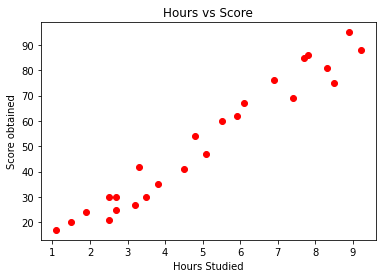

In [5]:
# Plotting the distribution of scores
plt.scatter(data['Hours'], data['Scores'],c="red")  
plt.title('Hours vs Score')
plt.ylabel('Score obtained')  
plt.xlabel("Hours Studied")
plt.show()

From the graph above, we can observe clearly that there is a positive linear relation between the number of hours studied and percentage of score.Hence we can use linear regression model to predict the scores obtained for based on number of hours studied.

# Preparing the Dataset


Now we will divide the data into "attributes" (inputs) and "labels" (outputs).

In [21]:
X=data.iloc[:,:-1].values #Attributes
y=data.iloc[:,1].values #Labels

The next step is to split this data into training and test sets.

We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)
print(f'Size of traning data {X_train.shape[0]} data points')
print(f'Size of testing data {X_test.shape[0]} data points')

Size of traning data 20 data points
Size of testing data 5 data points


# Training The Model

In [58]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train);

# Preidictions

Now as we have trained the model , its time to make prediction.

In [16]:
y_pred = regressor.predict(X_test) # Predicting the scores for X_test data

In [27]:
df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


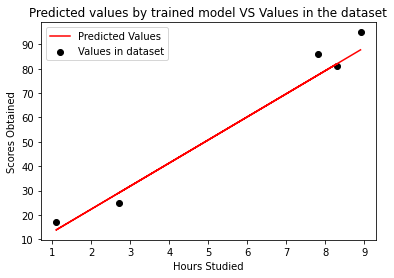

In [119]:
plt.scatter(X_test,y_test,label="Values in dataset",c="black")
plt.plot(X_test,y_pred,c="red",label="Predicted Values")
plt.xlabel("Hours Studied")
plt.ylabel("Scores Obtained")
plt.title("Predicted values by trained model VS Values in the dataset",style="normal")
plt.legend() 
plt.show()

It is evident from the graph that predicted values of scores obtained is quiet closer to what is given in the dataset for particular hours studied. Hence out model is able to make prediction (Scores Obtained) for the given input(Hours Studied) approximatey close.

# Acurracy of Model

# What will be pridicted score if student studied for 9.25 hr/day?

In [40]:
hour=[[9.25]]
predicted_score=regressor.predict(hour)
print(f'If studend studies for 9.25 hours/day, then its predicted score will be {predicted_score[0]}')

If studend studies for 9.25 hours/day, then its predicted score will be 93.69173248737538
